Maximale Tiefe des Baums: 3

Entscheidungsregeln für max_depth=1:
                 Regel
|--- Müll_Nein <= 0.50
  |   |--- class: Nein
|--- Müll_Nein >  0.50
    |   |--- class: Ja
                      


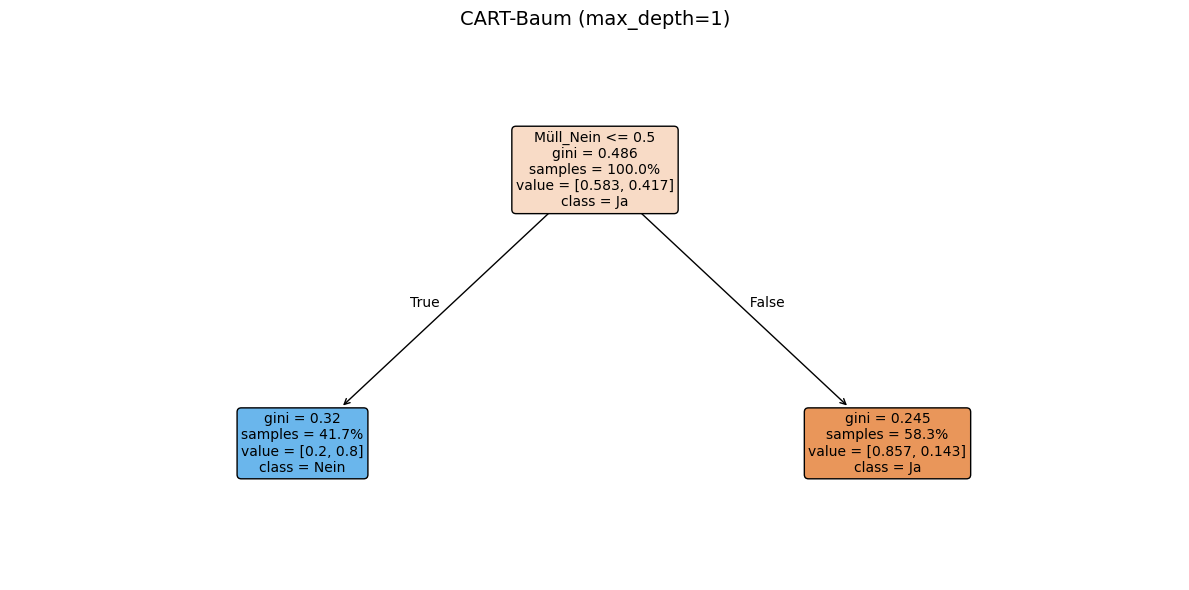


Entscheidungsregeln für max_depth=2:
                       Regel
      |--- Müll_Nein <= 0.50
|   |--- Wäsche_Nein <= 0.50
      |   |   |--- class: Ja
|   |--- Wäsche_Nein >  0.50
    |   |   |--- class: Nein
      |--- Müll_Nein >  0.50
|   |--- Wäsche_Nein <= 0.50
      |   |   |--- class: Ja
|   |--- Wäsche_Nein >  0.50
      |   |   |--- class: Ja
                            


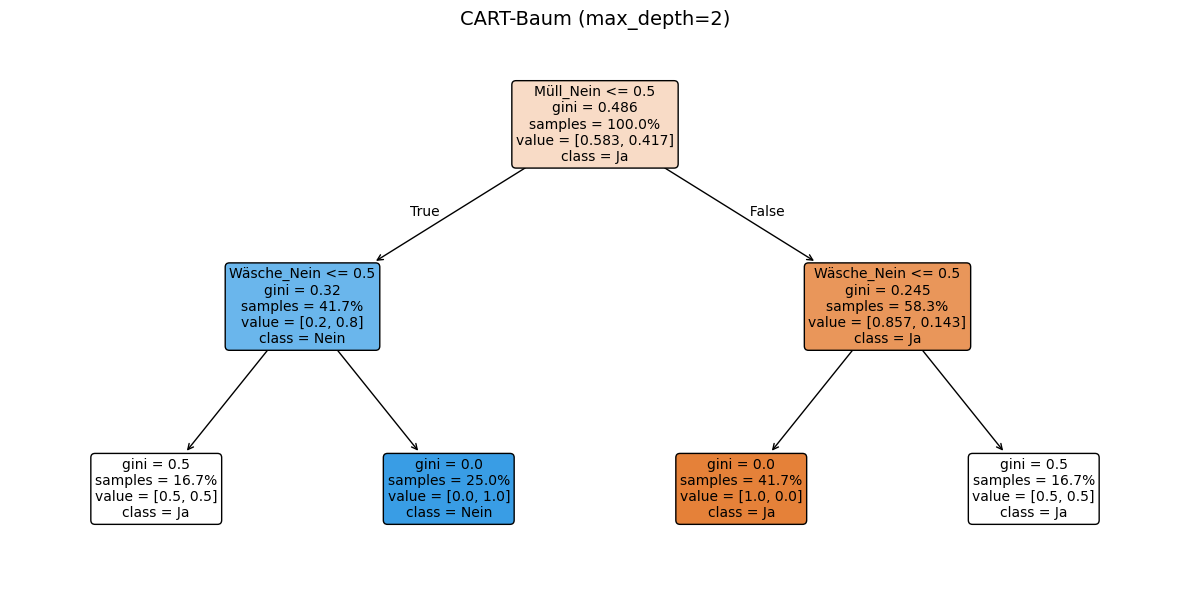


Entscheidungsregeln für max_depth=3:
                                Regel
               |--- Müll_Nein <= 0.50
         |   |--- Wäsche_Nein <= 0.50
|   |   |--- Geschirr_Partner <= 0.50
           |   |   |   |--- class: Ja
|   |   |--- Geschirr_Partner >  0.50
         |   |   |   |--- class: Nein
         |   |--- Wäsche_Nein >  0.50
             |   |   |--- class: Nein
               |--- Müll_Nein >  0.50
      |   |--- Kochen_Partner <= 0.50
               |   |   |--- class: Ja
      |   |--- Kochen_Partner >  0.50
    |   |   |--- Geschirr_Ich <= 0.50
           |   |   |   |--- class: Ja
    |   |   |--- Geschirr_Ich >  0.50
         |   |   |   |--- class: Nein
                                     


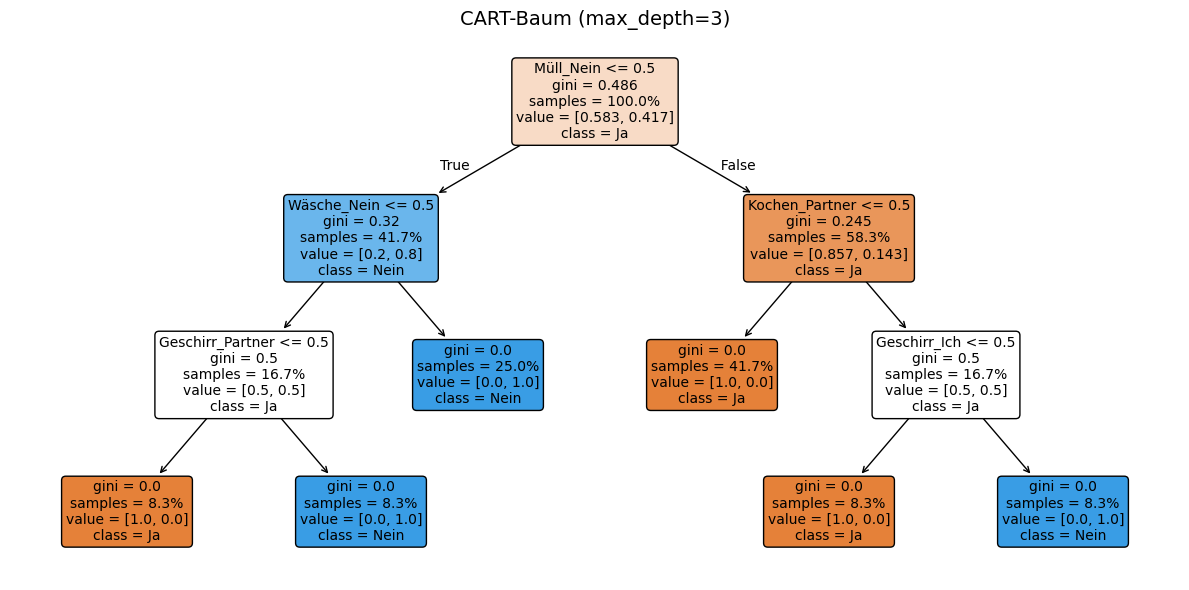

In [21]:
# 1. Bibliotheken importieren
import pandas as pd                                                 # pandas für DataFrame-Verarbeitung
from sklearn.tree import DecisionTreeClassifier, plot_tree           # DecisionTreeClassifier und Plot-Funktion
import matplotlib.pyplot as plt                                      # Matplotlib für Visualisierungen

# 2. Datensatz als pandas DataFrame erstellen
data = pd.DataFrame([                                               
    {'Geschirr':'Ich',     'Staubsaugen':'Partner','Wäsche':'Ja',   'Kochen':'Ich',     'Müll':'Ja',     'Sex':'Ja'},
    {'Geschirr':'Ich',     'Staubsaugen':'Ich',    'Wäsche':'Nein', 'Kochen':'Partner', 'Müll':'Nein',   'Sex':'Nein'},
    {'Geschirr':'Partner', 'Staubsaugen':'Partner','Wäsche':'Ja',   'Kochen':'Ich',     'Müll':'Nein',   'Sex':'Ja'},
    {'Geschirr':'Partner', 'Staubsaugen':'Ich',    'Wäsche':'Ja',   'Kochen':'Partner', 'Müll':'Ja',     'Sex':'Nein'},
    {'Geschirr':'Keiner',  'Staubsaugen':'Partner','Wäsche':'Nein', 'Kochen':'Ich',     'Müll':'Ja',     'Sex':'Nein'},
    {'Geschirr':'Keiner',  'Staubsaugen':'Ich',    'Wäsche':'Ja',   'Kochen':'Keiner',  'Müll':'Nein',   'Sex':'Ja'},
    {'Geschirr':'Ich',     'Staubsaugen':'Keiner', 'Wäsche':'Nein', 'Kochen':'Ich',     'Müll':'Nein',   'Sex':'Ja'},
    {'Geschirr':'Ich',     'Staubsaugen':'Ich',    'Wäsche':'Ja',   'Kochen':'Ich',     'Müll':'Nein',   'Sex':'Ja'},
    {'Geschirr':'Ich',     'Staubsaugen':'Ich',    'Wäsche':'Ja',   'Kochen':'Ich',     'Müll':'Nein',   'Sex':'Ja'},
    {'Geschirr':'Partner', 'Staubsaugen':'Keiner', 'Wäsche':'Nein', 'Kochen':'Keiner',  'Müll':'Ja',     'Sex':'Nein'},
    {'Geschirr':'Keiner',  'Staubsaugen':'Partner','Wäsche':'Ja',   'Kochen':'Partner', 'Müll':'Nein',   'Sex':'Ja'},
    {'Geschirr':'Ich',     'Staubsaugen':'Partner','Wäsche':'Nein', 'Kochen':'Keiner',  'Müll':'Ja',     'Sex':'Nein'},
])                                                                   # DataFrame mit 10 Beobachtungen und 6 Spalten

# 3. Merkmale und Zielvariable trennen
X = data.drop('Sex', axis=1)                                        # alle Spalten außer 'Sex' als Merkmale
y = data['Sex']                                                     # 'Sex' als Zielvariable

# 4. Kategoriale Variablen in numerische Dummy-Variablen umwandeln
X_enc = pd.get_dummies(X)                                           # One-Hot-Encoding aller Kategorien

# 5. Vollen CART-Baum ohne Tiefenbegrenzung trainieren
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)  # Modellinitialisierung
clf.fit(X_enc, y)                                                    # Modell an codierten Daten anpassen

# 6. Maximale Tiefe des Baums bestimmen
max_depth = clf.get_depth()                                         # maximale Baumtiefe ermitteln
print(f"Maximale Tiefe des Baums: {max_depth}")                     # ausgeben

# 7. Schrittweise Visualisierung für jeden Split (= Tiefe)
for depth in range(1, max_depth + 1):                               # Schleife über Tiefen 1..max_depth
    # 7.1. Modell mit begrenzter Tiefe trainieren
    clf_d = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)  # Modell mit max_depth
    clf_d.fit(X_enc, y)                                              # anpassen
    
    # 7.2. Baumtext-Regeln ausgeben (optional)
    rules = pd.DataFrame({'Regel': export_text(clf_d, feature_names=list(X_enc.columns)).split('\n')})  # Regeln als DataFrame
    print(f"\nEntscheidungsregeln für max_depth={depth}:")           
    print(rules.to_string(index=False))                             # Regeln lesbar ausgeben
    
    # 7.3. Baum grafisch plotten
    plt.figure(figsize=(12, 6))                                     # größere Figur für Übersicht
    plot_tree(
        clf_d,
        feature_names=list(X_enc.columns),                          # Dummy-Feature-Namen
        class_names=clf_d.classes_,                                 # Klassen ['Ja','Nein']
        filled=True,                                               # Knoten nach Klasse einfärben
        rounded=True,                                              # Abgerundete Knoten
        proportion=True,                                           # Proportionale Klassen-Häufigkeit anzeigen
        impurity=True,                                             # Gini-Impurity in jedem Knoten anzeigen
        fontsize=10                                                # Schriftgröße für Klarheit
    )
    plt.title(f"CART-Baum (max_depth={depth})", fontsize=14)       # Titel mit Font-Size
    plt.tight_layout()                                             # Layout anpassen
    plt.show()                                                     # Plot anzeigen
